In [1]:
#Import the libraries
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import datetime
import mplfinance as mpf

In [2]:
df_ZEEL = pd.read_excel("Zeel2002to2020.xlsx", index_col=0, parse_dates=True)
df_ZEEL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-07-01,39.138096,38.481468,38.847958,38.878498,4031528,33.182491
2002-07-02,40.115402,38.542549,38.725796,39.214447,14152321,33.469227
2002-07-03,39.764183,38.863228,39.031200,39.565666,8456844,33.769001
2002-07-04,40.833111,39.306068,39.871075,39.535126,12745157,33.742931
2002-07-05,40.008511,39.015930,40.008511,39.351879,6445895,33.586536


In [3]:
# df['MA5'] = df.Close.rolling(5).mean()
# df['MA20'] = df.Close.rolling(20).mean()

# Pivot = (High + Low + Close)/3
# Bottom CPR = (High + Low)/ 2
# Top CPR = (Pivot – BC) + Pivot

#To calculate the Base Pivot Point: Pivot Point (P) = (High + Low + Close)/3 
#To calculate the First Support Level: Support 1 (S1) = P – {.382 * (High  –  Low)} 
#To calculate the Second Support Level: Support 2 (S2) = P – {.618 * (High  –  Low)} 
#To calculate the First Resistance Level: Resistance 1 (R1) = P + {.382 * (High  –  Low)} 
#To calculate the Second Resistance Level: Resistance 2 (R2) = P + {.618 * (High  –  Low)} 
#To calculate the Third Resistance Level: Resistance 3 (R3) = P + {1 * (High  –  Low)}


In [4]:
start_date = '2020-11-28'
end_date = '2020-12-31'

# monthData = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)] when date is not index
# df_ZEEL =  pdr.DataReader("ZEEL.NS", data_source='yahoo', start=start_date, end=end_date)

dt_range = pd.date_range(start=start_date, end=end_date)
preMonthData = df_ZEEL[df_ZEEL.index.isin(dt_range)]
preMonthData

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-01,198.250000,190.000000,195.000000,195.649994,22924405,195.649994
2020-12-02,200.000000,193.850006,195.600006,197.750000,17412260,197.750000
2020-12-03,207.000000,198.800003,199.600006,204.500000,26333709,204.500000
2020-12-04,212.300003,205.500000,206.000000,206.850006,23908626,206.850006
2020-12-07,216.649994,206.550003,208.500000,215.800003,25237101,215.800003
2020-12-08,217.899994,208.300003,216.649994,212.750000,19510057,212.750000
2020-12-09,219.949997,214.250000,215.100006,215.550003,18236499,215.550003
2020-12-10,213.899994,208.250000,213.449997,212.500000,12690594,212.500000
2020-12-11,216.699997,209.500000,214.000000,212.699997,12922375,212.699997


In [5]:
high = preMonthData['High'].max()
low = preMonthData['Low'].min()
close = preMonthData['Close'].iloc[-1]

In [6]:
pivot = (high + low + close)/3
pivot

217.23333231608072

In [7]:
pivotBottom = (high + low)/2
pivotBottom

214.0999984741211

In [8]:
pivotTop = (pivot - pivotBottom) + pivot
pivotTop

220.36666615804035

In [9]:
s1 = pivot - (.382 * (high  -  low))
s1

198.8209334818522

In [10]:
s2 = pivot - (.618 * (high  -  low))
s2

187.44573420206706

In [11]:
r1 = pivot + (.382 * (high  -  low))
r1

235.64573115030925

In [12]:
r2 = pivot + (.618 * (high  -  low))
r2

247.02093043009438

In [13]:
r3 = pivot + (1 * (high  -  low))
r3

265.4333292643229

In [17]:
start_date = '2021-01-01'
end_date = '2021-01-29'

df =  pdr.DataReader("ZEEL.NS", data_source='yahoo', start=start_date, end=end_date)

dt_range = pd.date_range(start=start_date, end=end_date)
monthData = df[df.index.isin(dt_range)]
monthData

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,226.250000,223.000000,223.500000,224.949997,6985802,224.949997
2021-01-04,228.199997,216.000000,226.899994,219.050003,26346595,219.050003
2021-01-05,223.000000,215.149994,218.000000,222.500000,20605048,222.500000
2021-01-06,225.300003,217.000000,222.500000,221.199997,14154683,221.199997
2021-01-07,224.600006,218.100006,223.750000,218.949997,14428798,218.949997
2021-01-08,236.850006,220.699997,221.850006,231.149994,44035673,231.149994
2021-01-11,234.000000,222.500000,234.000000,223.649994,18011706,223.649994
2021-01-12,229.699997,223.699997,225.000000,226.149994,13723435,226.149994
2021-01-13,232.699997,223.500000,228.600006,227.899994,13442449,227.899994


In [18]:
# mpf.plot(monthData, type='candle')

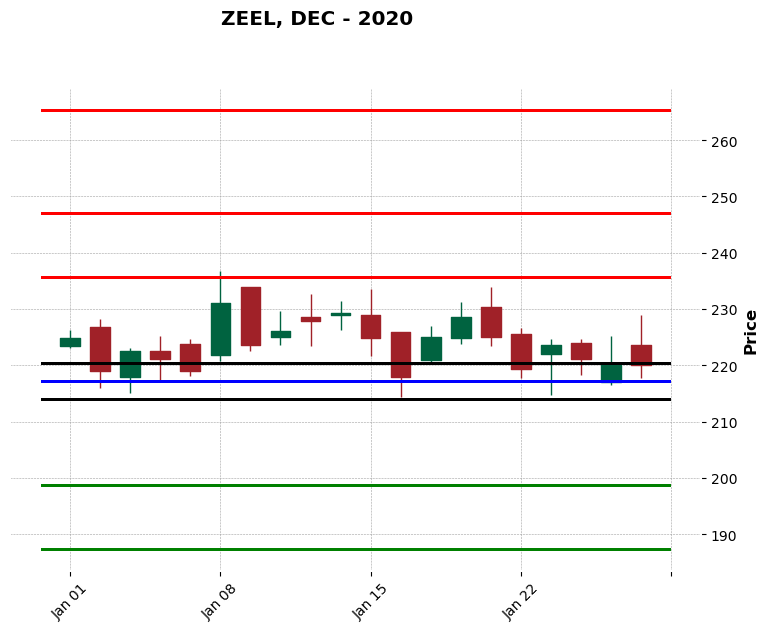

In [19]:
# mpf.plot(data,hlines=dict(hlines=[support,resistance],colors=['g','r'],linestyle='-.'), title='MSFT', ylabel='Price', ylabel_lower='Volume', type='candle', style='charles', volume=True, mav=(50, 200), savefig='test-mplfiance.png')
mpf.plot(
    monthData,
    hlines=dict(hlines=[pivot, pivotTop, pivotBottom,s1,s2,r1,r2,r3],colors=['blue','black','black','g','g','r','r','r'],linestyle='-'), 
    title='ZEEL, DEC - 2020', 
    ylabel='Price', 
    type='candle', 
    style='charles', 
    figscale=1.2, 
    mav=(50, 200)
)